# Implementation of CNN on Real/Fake Pokemon Card Cases

# Load Dataset

In [ ]:
!wget --no-check-certificate \
    https://github.com/FransTan/Computer-Vision---Orbit/blob/main/Fake_Pokemon_Card.zip?raw=true \
    -O /tmp/Fake_Pokemon.zip

--2022-03-31 14:41:32--  https://github.com/FransTan/Computer-Vision---Orbit/blob/main/Fake_Pokemon_Card.zip?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/FransTan/Computer-Vision---Orbit/raw/main/Fake_Pokemon_Card.zip [following]
--2022-03-31 14:41:32--  https://github.com/FransTan/Computer-Vision---Orbit/raw/main/Fake_Pokemon_Card.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/FransTan/Computer-Vision---Orbit/main/Fake_Pokemon_Card.zip [following]
--2022-03-31 14:41:32--  https://raw.githubusercontent.com/FransTan/Computer-Vision---Orbit/main/Fake_Pokemon_Card.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.

In [ ]:
import os 
import zipfile

local_zip = '/tmp/Fake_Pokemon.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')

zip_ref.close()

# Preprocessing Dataset

In [ ]:
import numpy as np 
import pandas as pd 
import shutil
from glob import glob 

In [ ]:
df = pd.DataFrame({'path': glob(os.path.join('/tmp/Fake_Pokemon_Card/train','*.JPG'))})
df['id'] = df.path.map(lambda x: x.split('/')[4].split(".")[0])
labels = pd.read_csv("/tmp/Fake_Pokemon_Card/train_labels.csv")
labels['id'] = labels['id'].astype('str')
labels = labels.sort_values(by=['id'], ignore_index = True)
df['id'] = df['id'].astype('str')
df = df.sort_values(by=['id'], ignore_index = True)
train = pd.merge(labels, df, on="id")

In [ ]:
train

,id,label,path
0,1,0,/tmp/Fake_Pokemon_Card/train/1.JPG
1,10,0,/tmp/Fake_Pokemon_Card/train/10.JPG
2,100,0,/tmp/Fake_Pokemon_Card/train/100.JPG
3,101,0,/tmp/Fake_Pokemon_Card/train/101.JPG
4,102,0,/tmp/Fake_Pokemon_Card/train/102.JPG
...,...,...,...
368,95,0,/tmp/Fake_Pokemon_Card/train/95.JPG
369,96,0,/tmp/Fake_Pokemon_Card/train/96.JPG
370,97,0,/tmp/Fake_Pokemon_Card/train/97.JPG
371,98,0,/tmp/Fake_Pokemon_Card/train/98.JPG


In [ ]:
dfs = pd.DataFrame({'path': glob(os.path.join('/tmp/Fake_Pokemon_Card/test','*.JPG'))})
dfs['id'] = dfs.path.map(lambda x: x.split('/')[4].split(".")[0])
labels_test = pd.read_csv("/tmp/Fake_Pokemon_Card/test_labels.csv")
labels_test['id'] = labels_test['id'].astype('str')
labels_test = labels_test.sort_values(by=['id'], ignore_index = True)
dfs['id'] = dfs['id'].astype('str')
dfs = dfs.sort_values(by=['id'], ignore_index = True)
valid = pd.merge(labels_test, dfs, on="id")

In [ ]:
valid

,id,label,path
0,374,0,/tmp/Fake_Pokemon_Card/test/374.JPG
1,375,0,/tmp/Fake_Pokemon_Card/test/375.JPG
2,376,0,/tmp/Fake_Pokemon_Card/test/376.JPG
3,377,0,/tmp/Fake_Pokemon_Card/test/377.JPG
4,378,0,/tmp/Fake_Pokemon_Card/test/378.JPG
...,...,...,...
73,447,1,/tmp/Fake_Pokemon_Card/test/447.JPG
74,448,1,/tmp/Fake_Pokemon_Card/test/448.JPG
75,449,1,/tmp/Fake_Pokemon_Card/test/449.JPG
76,450,1,/tmp/Fake_Pokemon_Card/test/450.JPG


In [ ]:
# Set the id as the index in train
train.set_index('id', inplace=True)
train.head()

,label,path
id,,
1,0,/tmp/Fake_Pokemon_Card/train/1.JPG
10,0,/tmp/Fake_Pokemon_Card/train/10.JPG
100,0,/tmp/Fake_Pokemon_Card/train/100.JPG
101,0,/tmp/Fake_Pokemon_Card/train/101.JPG
102,0,/tmp/Fake_Pokemon_Card/train/102.JPG


In [ ]:
# Set the id as the index in valid
valid.set_index('id', inplace=True)
valid.head()

,label,path
id,,
374,0,/tmp/Fake_Pokemon_Card/test/374.JPG
375,0,/tmp/Fake_Pokemon_Card/test/375.JPG
376,0,/tmp/Fake_Pokemon_Card/test/376.JPG
377,0,/tmp/Fake_Pokemon_Card/test/377.JPG
378,0,/tmp/Fake_Pokemon_Card/test/378.JPG


In [ ]:
# Create directories
train_path = 'base_dir/train'
valid_path = 'base_dir/valid'
test_path = '/tmp/Fake_Pokemon_Card/test'
for fold in [train_path, valid_path]:
    for subf in ["0", "1"]:
        os.makedirs(os.path.join(fold, subf))

In [ ]:
for image in train.index.values:
    # the id in the csv file does not have the .JPG extension therefore we add it here
    fname = image + '.JPG'
    label = str(train.loc[image,'label']) # get the label for a certain image
    src = os.path.join('/tmp/Fake_Pokemon_Card/train', fname)
    dst = os.path.join(train_path, label, fname)
    shutil.copyfile(src, dst)

for image in valid.index.values:
    fname = image + '.JPG'
    label = str(valid.loc[image,'label']) # get the label for a certain image
    src = os.path.join('/tmp/Fake_Pokemon_Card/test', fname)
    dst = os.path.join(valid_path, label, fname)
    shutil.copyfile(src, dst)

# Lanjutan Load & Read Dataset

In [ ]:
train_real_pokemon_names = os.listdir('/content/base_dir/train/1')
print(train_real_pokemon_names[:10])

train_fake_pokemon_names = os.listdir('/content/base_dir/train/0')
print(train_fake_pokemon_names[:10])

valid_real_pokemon_names = os.listdir('/content/base_dir/valid/1')
print(valid_real_pokemon_names[:10])

valid_fake_pokemon_names = os.listdir('/content/base_dir/valid/0')
print(valid_fake_pokemon_names[:10])

['222.JPG', '337.JPG', '187.JPG', '170.JPG', '309.JPG', '326.JPG', '244.JPG', '315.JPG', '213.JPG', '283.JPG']
['46.JPG', '122.JPG', '21.JPG', '100.JPG', '106.JPG', '92.JPG', '123.JPG', '84.JPG', '52.JPG', '27.JPG']
['418.JPG', '438.JPG', '433.JPG', '416.JPG', '412.JPG', '424.JPG', '431.JPG', '411.JPG', '434.JPG', '444.JPG']
['397.JPG', '381.JPG', '392.JPG', '398.JPG', '394.JPG', '399.JPG', '388.JPG', '378.JPG', '375.JPG', '393.JPG']


In [ ]:
print('total Fake Pokemon Card training images    : ', len(os.listdir('/content/base_dir/train/0')))
print('total Real Pokemon Card training images    : ', len(os.listdir('/content/base_dir/train/1')))
print('total Fake Pokemon Card validation images  : ', len(os.listdir('/content/base_dir/valid/0')))
print('total Real Pokemon Cards validation images : ', len(os.listdir('/content/base_dir/valid/1')))

total Fake Pokemon Card training images    :  123
total Real Pokemon Card training images    :  250
total Fake Pokemon Card validation images  :  28
total Real Pokemon Cards validation images :  50


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

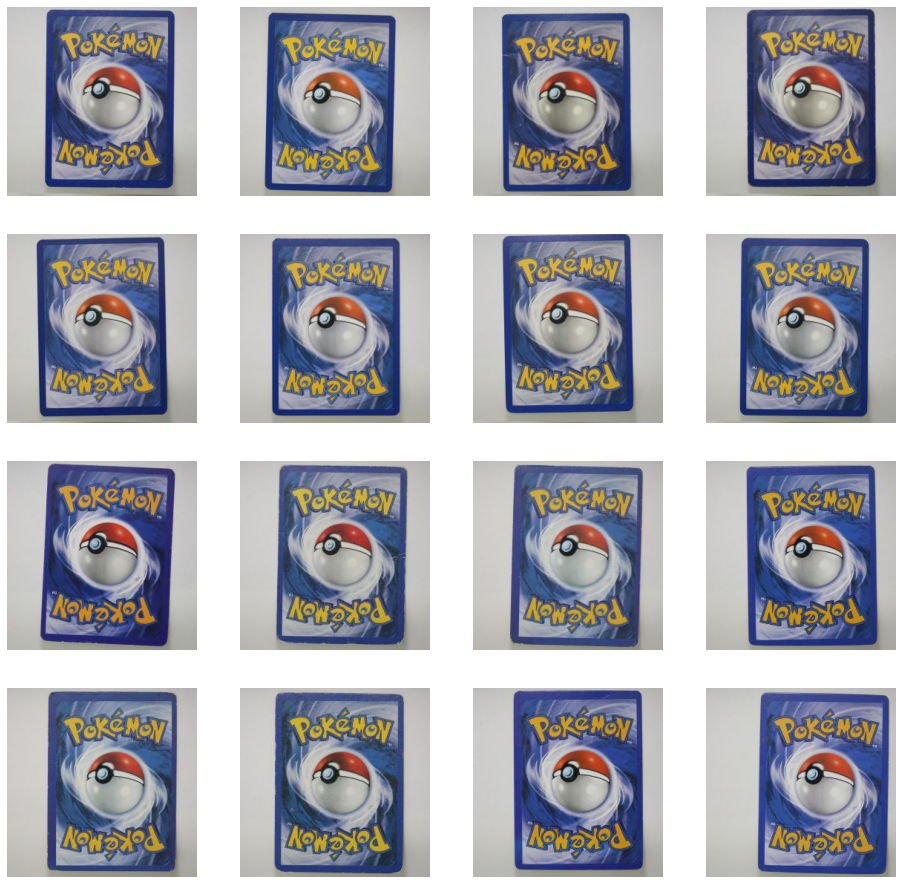

In [ ]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_real_pokemon = [os.path.join('/content/base_dir/train/1',fname)
                      for fname in train_real_pokemon_names[pic_index-8:pic_index]]
                      
next_fake_pokemon  = [os.path.join('/content/base_dir/train/0', fname)
                  for fname in train_fake_pokemon_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_real_pokemon + next_fake_pokemon):
  sp = plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Membuat Model CNN

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

train_generator = train_datagen.flow_from_directory(
    '/content/base_dir/train',
    classes = ['0','1'],
    target_size = (200,200),
    batch_size = 120,
    class_mode ='binary'
)

valid_generator = validation_datagen.flow_from_directory(
    '/content/base_dir/valid',
    classes = ['0','1'],
    target_size = (200,200),
    batch_size = 19,
    class_mode ='binary',
    shuffle = False
)

Found 373 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (5, 5), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                                            activation='relu',padding='same',
                                                            input_shape = (200,200,3),
                                                            kernel_initializer='he_normal',
                                                            bias_initializer='zeros'),
                                    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    # tf.keras.layers.Conv2D(64, (3, 3), strides=(2,2),
                                    #                        activation='relu',padding='same',
                                    #                        input_shape = (200,200,3),
                                    #                        kernel_initializer='he_normal',
                                    #                        bias_initializer='zeros'),
                                    # tf.keras.layers.MaxPool2D(pool_size=(2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(128,activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid),])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=4,
                    epochs=15,
                    verbose=1,
                    validation_data=valid_generator,
                    validation_steps=8)

Epoch 1/15
4/4 [==============================] - 8s 2s/step - loss: 0.9036 - accuracy: 0.5630 - val_loss: 0.6095 - val_accuracy: 0.6538
Epoch 2/15
4/4 [==============================] - 9s 2s/step - loss: 0.6516 - accuracy: 0.6783
Epoch 3/15
4/4 [==============================] - 8s 2s/step - loss: 0.5560 - accuracy: 0.6783
Epoch 4/15
4/4 [==============================] - 4s 921ms/step - loss: 0.4846 - accuracy: 0.7641
Epoch 5/15
4/4 [==============================] - 4s 1s/step - loss: 0.5311 - accuracy: 0.7185
Epoch 6/15
4/4 [==============================] - 4s 906ms/step - loss: 0.4572 - accuracy: 0.7668
Epoch 7/15
4/4 [==============================] - 4s 966ms/step - loss: 0.4482 - accuracy: 0.8177
Epoch 8/15
4/4 [==============================] - 4s 970ms/step - loss: 0.4188 - accuracy: 0.8097
Epoch 9/15
4/4 [==============================] - 4s 1s/step - loss: 0.3841 - accuracy: 0.8525
Epoch 10/15
4/4 [==============================] - 4s 909ms/step - loss: 0.3498 - accuracy:

# Evaluasi Model dengan metric Accuracy, ROC-Curve, AUC

In [ ]:
model.evaluate(valid_generator)

5/5 [==============================] - 0s 74ms/step - loss: 0.7600 - accuracy: 0.7564


[0.7599605917930603, 0.7564102411270142]

In [ ]:
STEP_SIZE_TEST=valid_generator.n//valid_generator.batch_size
valid_generator.reset()
preds = model.predict(valid_generator,verbose=1)

5/5 [==============================] - 1s 97ms/step


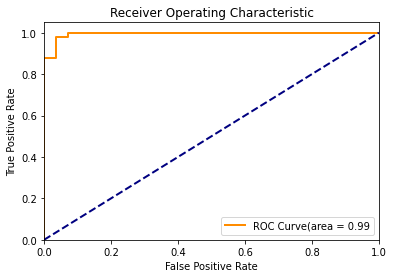

In [ ]:
fpr,tpr,_=roc_curve(valid_generator.classes,preds)
roc_auc=auc(fpr,tpr)

plt.figure()
lw=2
plt.plot(fpr,tpr,color='darkorange',
         lw=lw, label='ROC Curve(area = %0.2f' %roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Save Model CNN

In [ ]:
# format penyimpanan model umumnya h5
model.save('model_pokemon_card.h5')

# Prediksi dengan Model CNN yang dibuat

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

upload = files.upload()

for fn in upload.keys():

  path = '/content/' +fn
  img = image.load_img(path, target_size=(200,200))
  x=image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] < 0.5:
    print(fn+ 'Fake')
  else:
    print(fn+ 'Real')